# Titanic - Machine Learning From Disaster (Kaggle Challenge)
## Predictive model to ascertain likelihood of survival at the (unfortunate) Titanic based on given parameters. 
### From the perspective of a Year 1 - Business Analytics Student

### Would follow Ken Jee's approach to analyzing the data. <br>Link to his YouTube channel: (https://www.youtube.com/@KenJee_ds/)

## *__Data Overview__* (WIP)

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #For Logistic Regression

## *__Preliminary Data Loading and Investigation__*

### 1. Data Loading

In [10]:
train_set = pd.read_csv("/Users/geolangsatnarzary/Study - NTU_NBS/01 - A-Career/Kaggle/train.csv")
test_set = pd.read_csv("/Users/geolangsatnarzary/Study - NTU_NBS/01 - A-Career/Kaggle/test.csv")

# Pre-defining the data sets with training or testing indicators for future data merges
train_set["train_test"] = 1
test_set["train_test"] = 0

#Setting all values of test-set to NaN
test_set["Survived"] = np.NaN

# Full merged data for future use
df = pd.concat([train_set,test_set])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


### 2. Understanding the dataset and central tendencies of numeric data

In [13]:
df.info()
df.head(10)

# Training Set Data: Statistical analysis on the numeric data along with central tendencies of data
train_set.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


### 3. Seperating numeric and categorical data for further analysis 

In [15]:
# Separating Numeric and Categorical Data 
train_num = train_set[["Age","SibSp","Parch","Fare"]]
train_cat = train_set[["Survived","Pclass","Sex","Ticket","Cabin","Embarked"]]

### 4. Histograms to look at numeric data distribution 

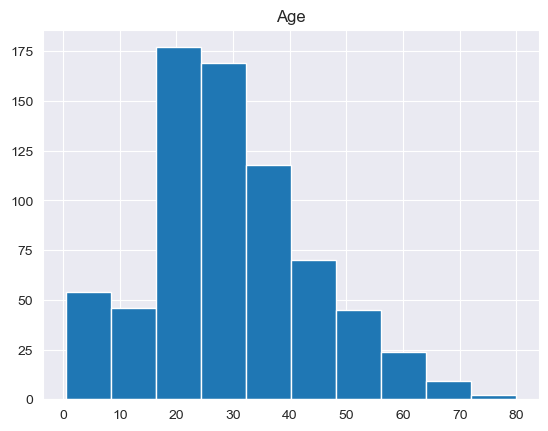

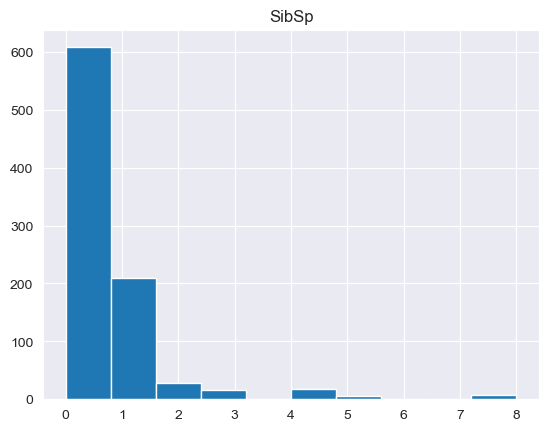

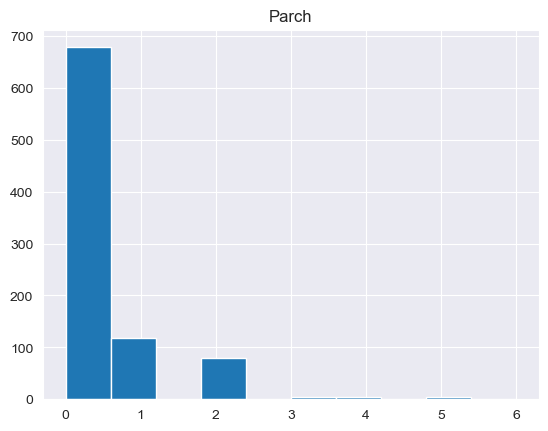

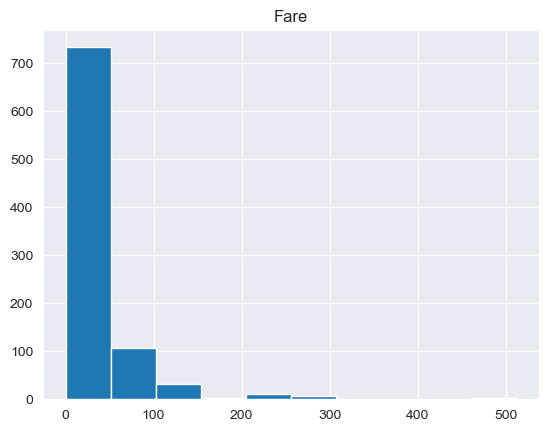

In [16]:
%matplotlib inline
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

### Note: Only "Age" variable is somewhat normally distributed but others are not. <br> Will decide to normalize based on further data investigation.

## *__Finding correlation between "Survival" and different variables - Logistic Regression (Categorical Y)__*

#### 1. Preparing data for Analysis

In [4]:
original_data_copy = df


y = df["Survived"]

X = df[["Pclass","Sex","Age","SibSp","Parch","Fare"]]

gender_mapping = {"male": 1, "female": 0}
X["Sex"] = X["Sex"].map(gender_mapping)

print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare
0         3    1  22.0      1      0   7.2500
1         1    0  38.0      1      0  71.2833
2         3    0  26.0      0      0   7.9250
3         1    0  35.0      1      0  53.1000
4         3    1  35.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
886       2    1  27.0      0      0  13.0000
887       1    0  19.0      0      0  30.0000
888       3    0   NaN      1      2  23.4500
889       1    1  26.0      0      0  30.0000
890       3    1  32.0      0      0   7.7500

[891 rows x 6 columns]


/var/folders/g3/qm_v9cxd4kv16kx3gxm1vbch0000gn/T/ipykernel_17256/1601353330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = X["Sex"].map(gender_mapping)


#### 2. Data Cleanup

In [5]:
X[X.isna().any(axis=1)]
#print(len(X[X.isna().any(axis=1)])) - 177

#Replacing NaN values with mean age
X[X.isna().any(axis=1)] = X["Age"].mean()

/var/folders/g3/qm_v9cxd4kv16kx3gxm1vbch0000gn/T/ipykernel_17256/3009149820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.isna().any(axis=1)] = X["Age"].mean()


#### 3. Logistic Regression

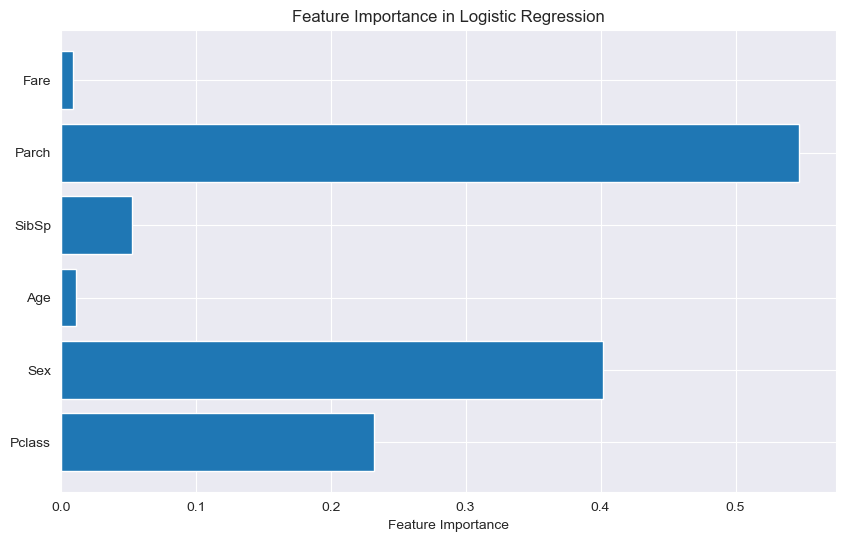

In [6]:
model = LogisticRegression()
model.fit(X, y)

# Create a bar chart to visualize feature importance (same as previous code)
feature_importance = np.abs(model.coef_[0])
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Logistic Regression")
plt.show()

#### Preliminary Notes:
##### 1. "Parch" has the highest feature importance - The # of parents/children on board.
######    This could likely mean that Parents/Children travelling together were given very high importance. Requires further investigation.
##### 2. "Sex" has the second highest feature importance - The person's gender.
######    This could likely mean that belonging to certain gender could increase the chances of survival. Requires further investigation.
##### 3. "Pclass" has the third highest feature importance - The ticket class.
######    This could likely mean that belonging to certain Pclass could increase the chances of survival. Requires further investigation.